<a href="https://colab.research.google.com/github/ShubhamX12/demo/blob/main/image_classfication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout


In [6]:
 (trainx,trainy),(testx,testy)=datasets.cifar10.load_data();

170498071/170498071 [==============================] - 6s 0us/step


In [12]:
print(trainx.shape)  
testx.shape

(50000, 32, 32, 3)


(10000, 32, 32, 3)

In [14]:
print(trainx[0]);

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


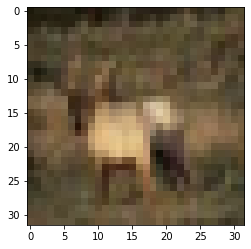

In [17]:
plt.imshow(trainx[3])

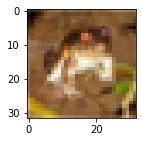

In [21]:
plt.figure(figsize=(15,2))
plt.imshow(trainx[0])

In [26]:
trainy=trainy.reshape(-1,) 
trainy[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [30]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [28]:
def plot_sample(x,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index]);
    plt.xlabel(classes[y[index]])

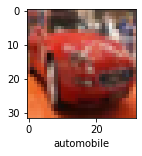

In [33]:
plot_sample(trainx,trainy,5)

In [35]:
trainx=trainx/255;
testx=testx/255;

In [45]:
#model creation in python
cnn=models.Sequential([
        layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu",input_shape=(32,32,3)),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu",input_shape=(32,32,3)),
        layers.MaxPooling2D((2,2)),
        layers.Flatten(),             
        layers.Dense(64,activation='relu'), 
        layers.Dense(10,activation='softmax')
    ])

In [48]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [49]:
cnn.fit(trainx,trainy,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 14s 4ms/step - loss: 1.5543 - accuracy: 0.4340
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2352 - accuracy: 0.5622
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0986 - accuracy: 0.6154
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0170 - accuracy: 0.6447
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9639 - accuracy: 0.6643
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9207 - accuracy: 0.6785
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8871 - accuracy: 0.6912
Epoch 8/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8536 - accuracy: 0.7014
Epoch 9/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8281 - accuracy: 0.7122
Epoch 10/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.79

In [50]:
cnn.evaluate(testx,testy)

313/313 [==============================] - 1s 3ms/step - loss: 0.9658 - accuracy: 0.6721


[0.9658412337303162, 0.6721000075340271]

In [53]:
testy=testy.reshape(-1,)
testy[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

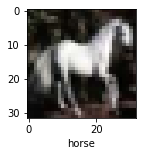

In [56]:
plot_sample(testx,testy,13);

In [58]:
y_pred=cnn.predict(testx)
y_pred[:5]

313/313 [==============================] - 1s 2ms/step


array([[8.42080638e-03, 5.98627282e-03, 3.45549849e-03, 8.34243238e-01,
        2.28808820e-03, 7.73045123e-02, 1.51379788e-02, 1.01976236e-03,
        4.06668112e-02, 1.14770485e-02],
       [1.11601129e-02, 7.10252151e-02, 3.24242194e-07, 1.13761723e-06,
        2.03683797e-07, 9.28179933e-09, 1.93898031e-09, 2.53274237e-07,
        9.17553782e-01, 2.58896674e-04],
       [7.05592111e-02, 1.83541685e-01, 1.01837213e-03, 3.89743201e-03,
        1.76847097e-04, 4.46596765e-04, 2.73615413e-04, 8.38132750e-04,
        6.08885586e-01, 1.30362526e-01],
       [6.47260249e-01, 7.69382343e-03, 2.24227272e-03, 1.85339467e-03,
        2.03419924e-02, 1.12862381e-05, 3.92551097e-04, 1.77291353e-04,
        3.18249047e-01, 1.77809421e-03],
       [1.30384078e-05, 2.55119172e-04, 3.78295965e-03, 2.21422724e-02,
        5.24441719e-01, 9.26744309e-04, 4.48016137e-01, 1.35284106e-04,
        2.62264861e-04, 2.44472049e-05]], dtype=float32)

In [59]:
np.argmax([5,23,332])

2

In [60]:
y_classes=[np.argmax(element) for element in y_pred];
y_classes[:5]

[3, 8, 8, 0, 4]

In [61]:
testy[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

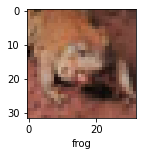

In [68]:
plot_sample(testx,testy,5)

In [63]:
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [67]:
classes[y_classes[5]]

'frog'

In [69]:
classes[5]

'dog'

In [71]:

from sklearn.metrics import classification_report
print("Classfication report:",classification_report(testy,y_classes))

Classfication report:               precision    recall  f1-score   support

           0       0.73      0.71      0.72      1000
           1       0.81      0.76      0.79      1000
           2       0.63      0.47      0.54      1000
           3       0.50      0.47      0.48      1000
           4       0.62      0.62      0.62      1000
           5       0.69      0.46      0.55      1000
           6       0.66      0.83      0.74      1000
           7       0.63      0.78      0.70      1000
           8       0.75      0.83      0.79      1000
           9       0.69      0.81      0.74      1000

    accuracy                           0.67     10000
   macro avg       0.67      0.67      0.67     10000
weighted avg       0.67      0.67      0.67     10000

